In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Загрузка данных

In [19]:
data = pd.read_csv('adult.csv')

print("Размер исходного датасета:", data.shape)
data.head()

Размер исходного датасета: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Проверка пропусков

In [21]:
data = data.replace('?', np.nan)

print("Количество пропусков по столбцам:")
print(data.isna().sum())

Количество пропусков по столбцам:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


Удаляем пропуски

In [22]:
data = data.dropna()

print("Размер датасета после удаления пропусков:", data.shape)
print(data.isna().sum())

Размер датасета после удаления пропусков: (45222, 15)
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


Визуализация данных

Распределение доходов

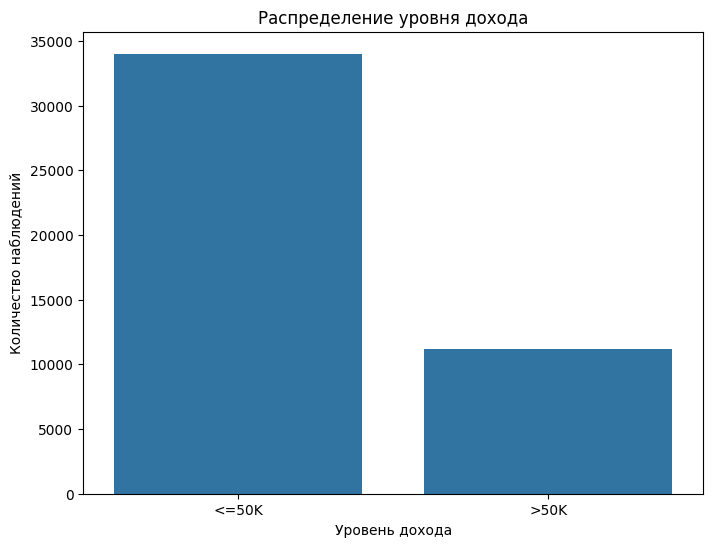

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='income', data=data)
plt.title('Распределение уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=0)
plt.show()

Возраст / доходы

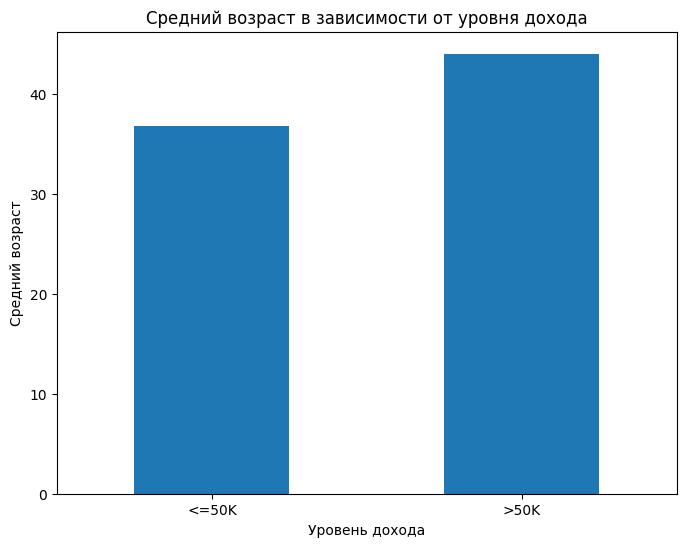

In [24]:
plt.figure(figsize=(8,6))
mean_age = data.groupby('income')['age'].mean()
mean_age.plot(kind='bar')
plt.title('Средний возраст в зависимости от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Средний возраст')
plt.xticks(rotation=0)
plt.show()


Преобразуем категориальные признаки

In [25]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
5,34,198693,6,0,0,30,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


Разделение на обучающую и тестовую выборку

In [27]:
X = data_encoded.drop('income_>50K', axis=1)
y = data_encoded['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (36177, 96)
Размер тестовой выборки: (9045, 96)


Обучение моделей

Логистическая регрессия

In [35]:
log_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, random_state=42)
)

log_model.fit(X_train, y_train)

log_train_score = log_model.score(X_train, y_train)
log_test_score = log_model.score(X_test, y_test)

print("Точность на обучающей выборке:", log_train_score)
print("Точность на тестовой выборке:", log_test_score)

Точность на обучающей выборке: 0.8485501838184482
Точность на тестовой выборке: 0.851077943615257


Метод опорных векторов

In [36]:
svm_model = make_pipeline(
    StandardScaler(),
    SVC()
)

svm_model.fit(X_train, y_train)

svm_train_score = svm_model.score(X_train, y_train)
svm_test_score = svm_model.score(X_test, y_test)

print("Точность на обучающей выборке:", svm_train_score)
print("Точность на тестовой выборке:", svm_test_score)

Точность на обучающей выборке: 0.8579484202670205
Точность на тестовой выборке: 0.8519624101713654


**Выводы по проделанной работе: **

a) Загружен датасет —> Строки с пропусками удалены —> Преобразованы категориальные признаки —> Данные разделены на обучающую и тестовую выборки —> Использовано масштабирование признаков

b) В результате обучения были получены следующие показатели точности:

Логичтическая регрессия
Точность на обучающей выборке: 0.85
Точность на тестовой выборке: 0.85

Метод опорных векторов
Точность на обучающей выборке: 0.86
Точность на тестовой выборке: 0.85

Обе модели показали похожие результаты.
Метод опорных векторов оказался немного точнее, но разница несущественная. При этом логистическая регрессия обучилась гораздо быстрее (0 сек vs 2 ми)

c) Обе модели успешно справились с задачей. Чтобы улучшить результат, требуется сбалансировать датасет, чтобы классы уровня доходности имели одинаковый вес. Возможно, отбор наиболее важных переменных мог бы улучшить результат.